# DATA VISULAIZATION AND MULTICOLLINEARITY DETECTION EXERCISE

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

# Problem: The Boston House Pricing

## Dataset Description

Scikit-learn toy datasets: scikit-learn package of Python comes with a few small standard datasets that do not require to download any file from some external website.
https://scikit-learn.org/stable/datasets/toy_dataset.html

This Boston House Pricingdata has been taken from a reaserch paper, which can be found at 
[Source: Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

## Loading Data

In [2]:
#loading the dataset from sklearn.
boston_dataset = load_boston()
print(boston_dataset.DESCR)
print(boston_dataset.feature_names)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\DELL LATITUDE E 5470\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative data

## Creating Dataframe

In [3]:
#Let us create a dataframe from the two ndarrays 'data' and 'target' from boston_dataset.
dataset = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
#Add column with the price (target).
dataset['PRICE'] = boston_dataset.target
#let's see the dataframe we have created.
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Visualising Data - Histograms and Distributions

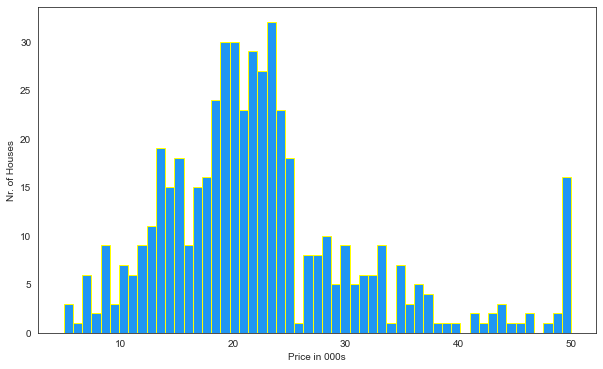

In [15]:
#Let us draw histograms for different features. 
#Recall that a histigram is a plot of frequencies of different values in a feature against these values. 
#We will use method hist of the package matplotlib for this purpose.
#Let us first see the distribution of the target, which is the house price.
plt.figure(figsize=(10, 6))
plt.hist(dataset['PRICE'],bins=55, ec='yellow', color='#2196f3')
#Here we randomly selected 50 bins, price is a continuous variable here. 
#You can use the method dataset['PRICE'].value_counts() to see the distinct values in this column.
#This attribute bin can also be skipped, in that case matplotlib selects an appropriate number of bins by itself.
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Houses')
plt.show()

5.713    3
6.167    3
6.127    3
6.229    3
6.405    3
        ..
5.859    1
6.416    1
5.572    1
5.880    1
6.976    1
Name: RM, Length: 446, dtype: int64 count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64


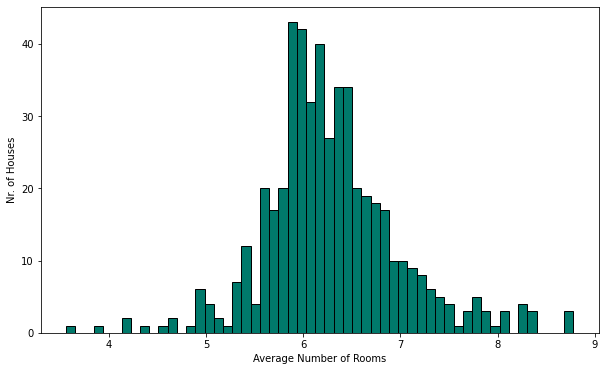

In [5]:
#Now let us see distribution of RM which is the avarage number of rooms in the area.
#This again is a continuous variables. We are not specifying number of  bins here, letting matplotlib decide for itself.
print(dataset['RM'].value_counts(), dataset['RM'].describe())
plt.figure(figsize=(10, 6))
plt.hist(dataset['RM'], bins=55,ec='black', color='#00796b')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()


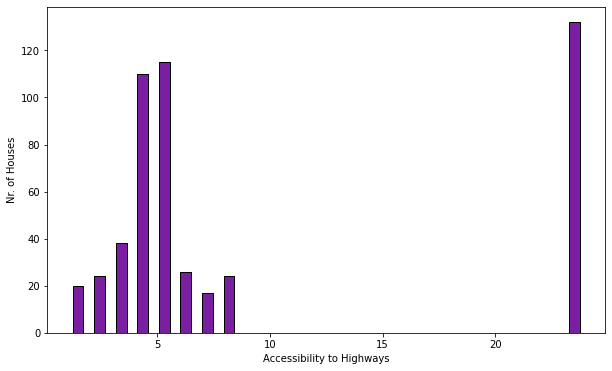

In [6]:
#Now let us see distribution of RAD which indicates the index of accessibilty to highways.
plt.figure(figsize=(10, 6))
plt.hist(dataset['RAD'], bins=24, ec='black', color='#7b1fa2', rwidth=0.5)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

0.0    471
1.0     35
Name: CHAS, dtype: int64


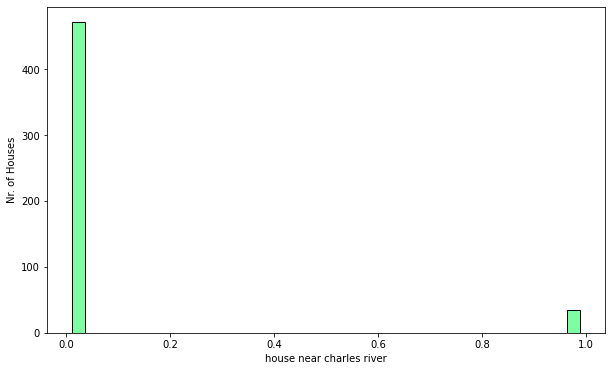

In [7]:
#TASK FOR YOU
print(dataset['CHAS'].value_counts())
plt.figure(figsize=(10,6))
plt.hist(dataset['CHAS'],bins=20, ec='black', color='#7bffa2', rwidth=0.5)
plt.xlabel('house near charles river')
plt.ylabel('Nr. of Houses')
plt.show()
#Run the above statement and then plot histogram for this feature CHAS which shows if the house is situated near Charle' River.

# the result shows that only 35 houses are present near charles river

## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [8]:
#corr is the method in pandas which can directly find correlation between two quantities.
#Let us find the correlation between PRICE (target) and RM (feature).
dataset['PRICE'].corr(dataset['RM'])
#The resulting value shows moderate positive correlation

0.6953599470715396

In [9]:
#Similarly let us find the correlation between PRICE (target) and PTRATIO (feature).
dataset['PRICE'].corr(dataset['PTRATIO'])
#This shows moderate negavtive correlation

-0.5077866855375618

In [10]:
#Now let us find all correlation coefficients at once
# dataset.corr()
#Here observe that correlation between INDUS and DIS is quite high and may cause multicollinearity.
#Also note that the values are same both ways, i.e. ZN and CRIME is same as CRIME and ZN.
#So upper right diagonal is same as lower left diagonal.
#Also note that correlation of a variable with itself is always 1.

#Notice that finding higher values in this dense map is difficult, there is an easier way to do this - by using a heatmap.

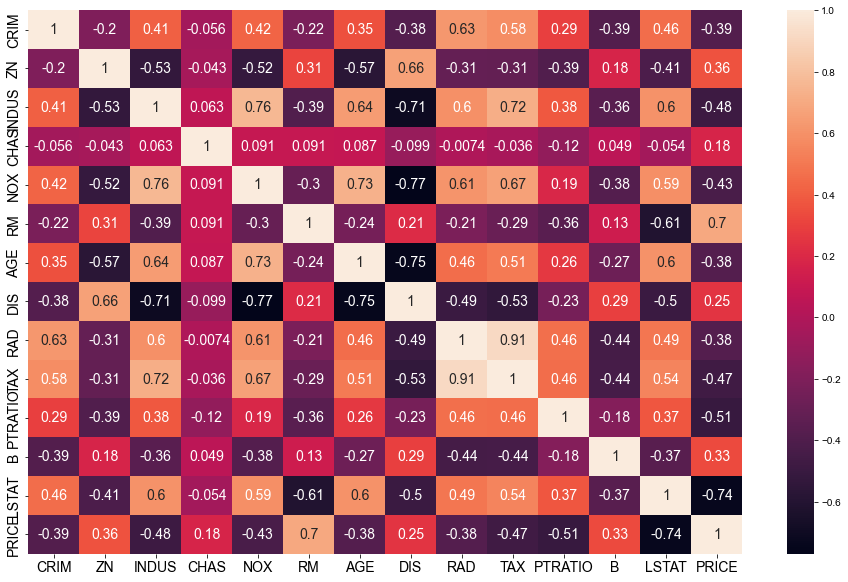

In [11]:
#A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. 
#The color bar on the right side is the key.

#Generating a heatmap for all correlation coefficients. 
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(),  annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Visualizing Correlation Through Scatter Plot

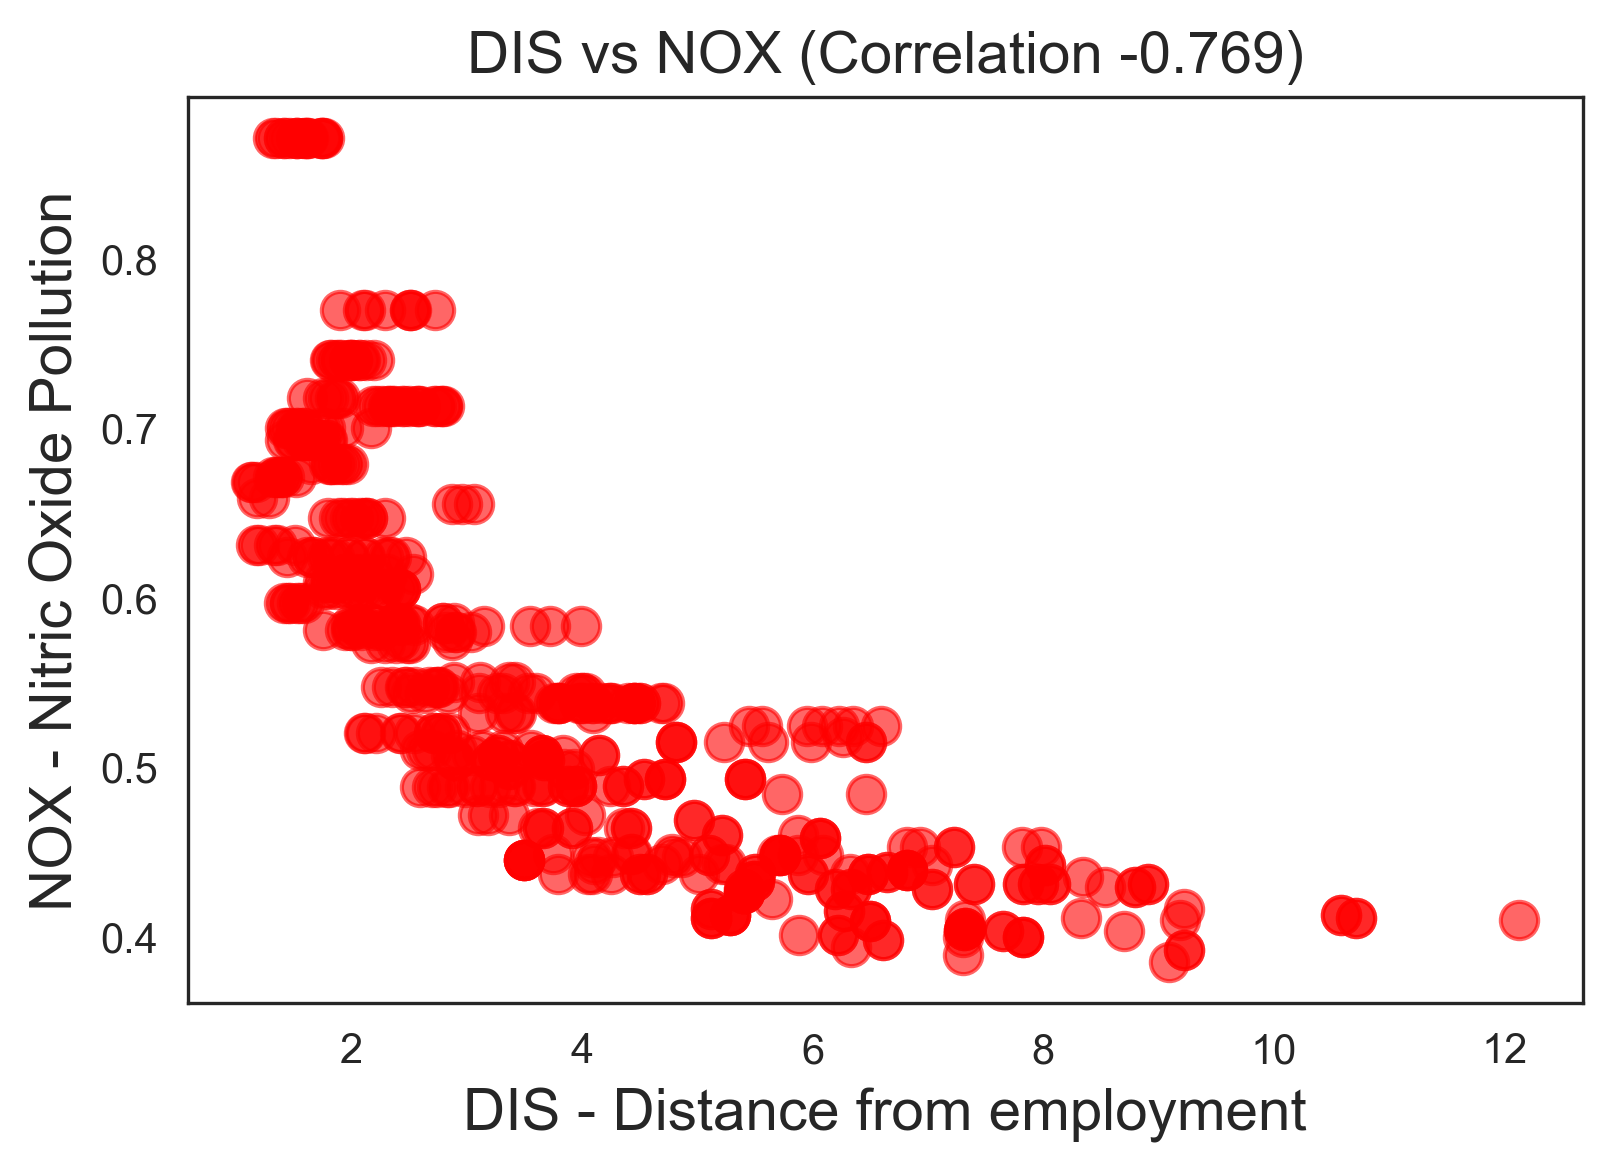

In [12]:
#Let us create scatterplot between NOX and DIS to visualize correlation.

#Let us print the correlation found from corr method too in the heading to verify the results.
nox_dis_corr = round(dataset['NOX'].corr(dataset['DIS']), 3)

plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(x=dataset['DIS'], y=dataset['NOX'], alpha=0.6, s=80, color='red')
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.show()
#The plot shows quite strong neagtive correlation between the two features.

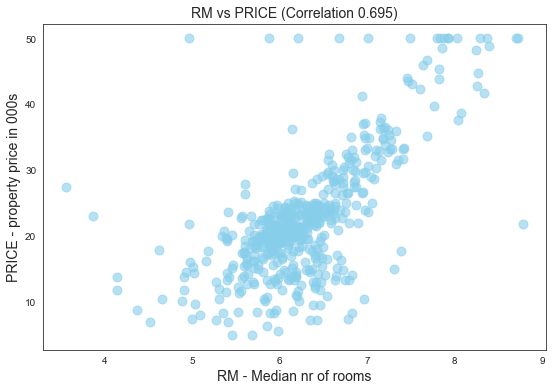

In [13]:
#Another scatter plot between RM and PRICE.
rm_tgt_corr = round(dataset['RM'].corr(dataset['PRICE']), 3)
plt.figure(figsize=(9, 6))
plt.scatter(x=dataset['RM'], y=dataset['PRICE'], alpha=0.6, s=80, color='skyblue')
plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM - Median nr of rooms', fontsize=14)
plt.ylabel('PRICE - property price in 000s', fontsize=14)
plt.show()

### The PairPlot
- This is a method of seaborn package, which can be used to see all the scatterplots as well as histograms at once.
- The diagonal plots are histograms.

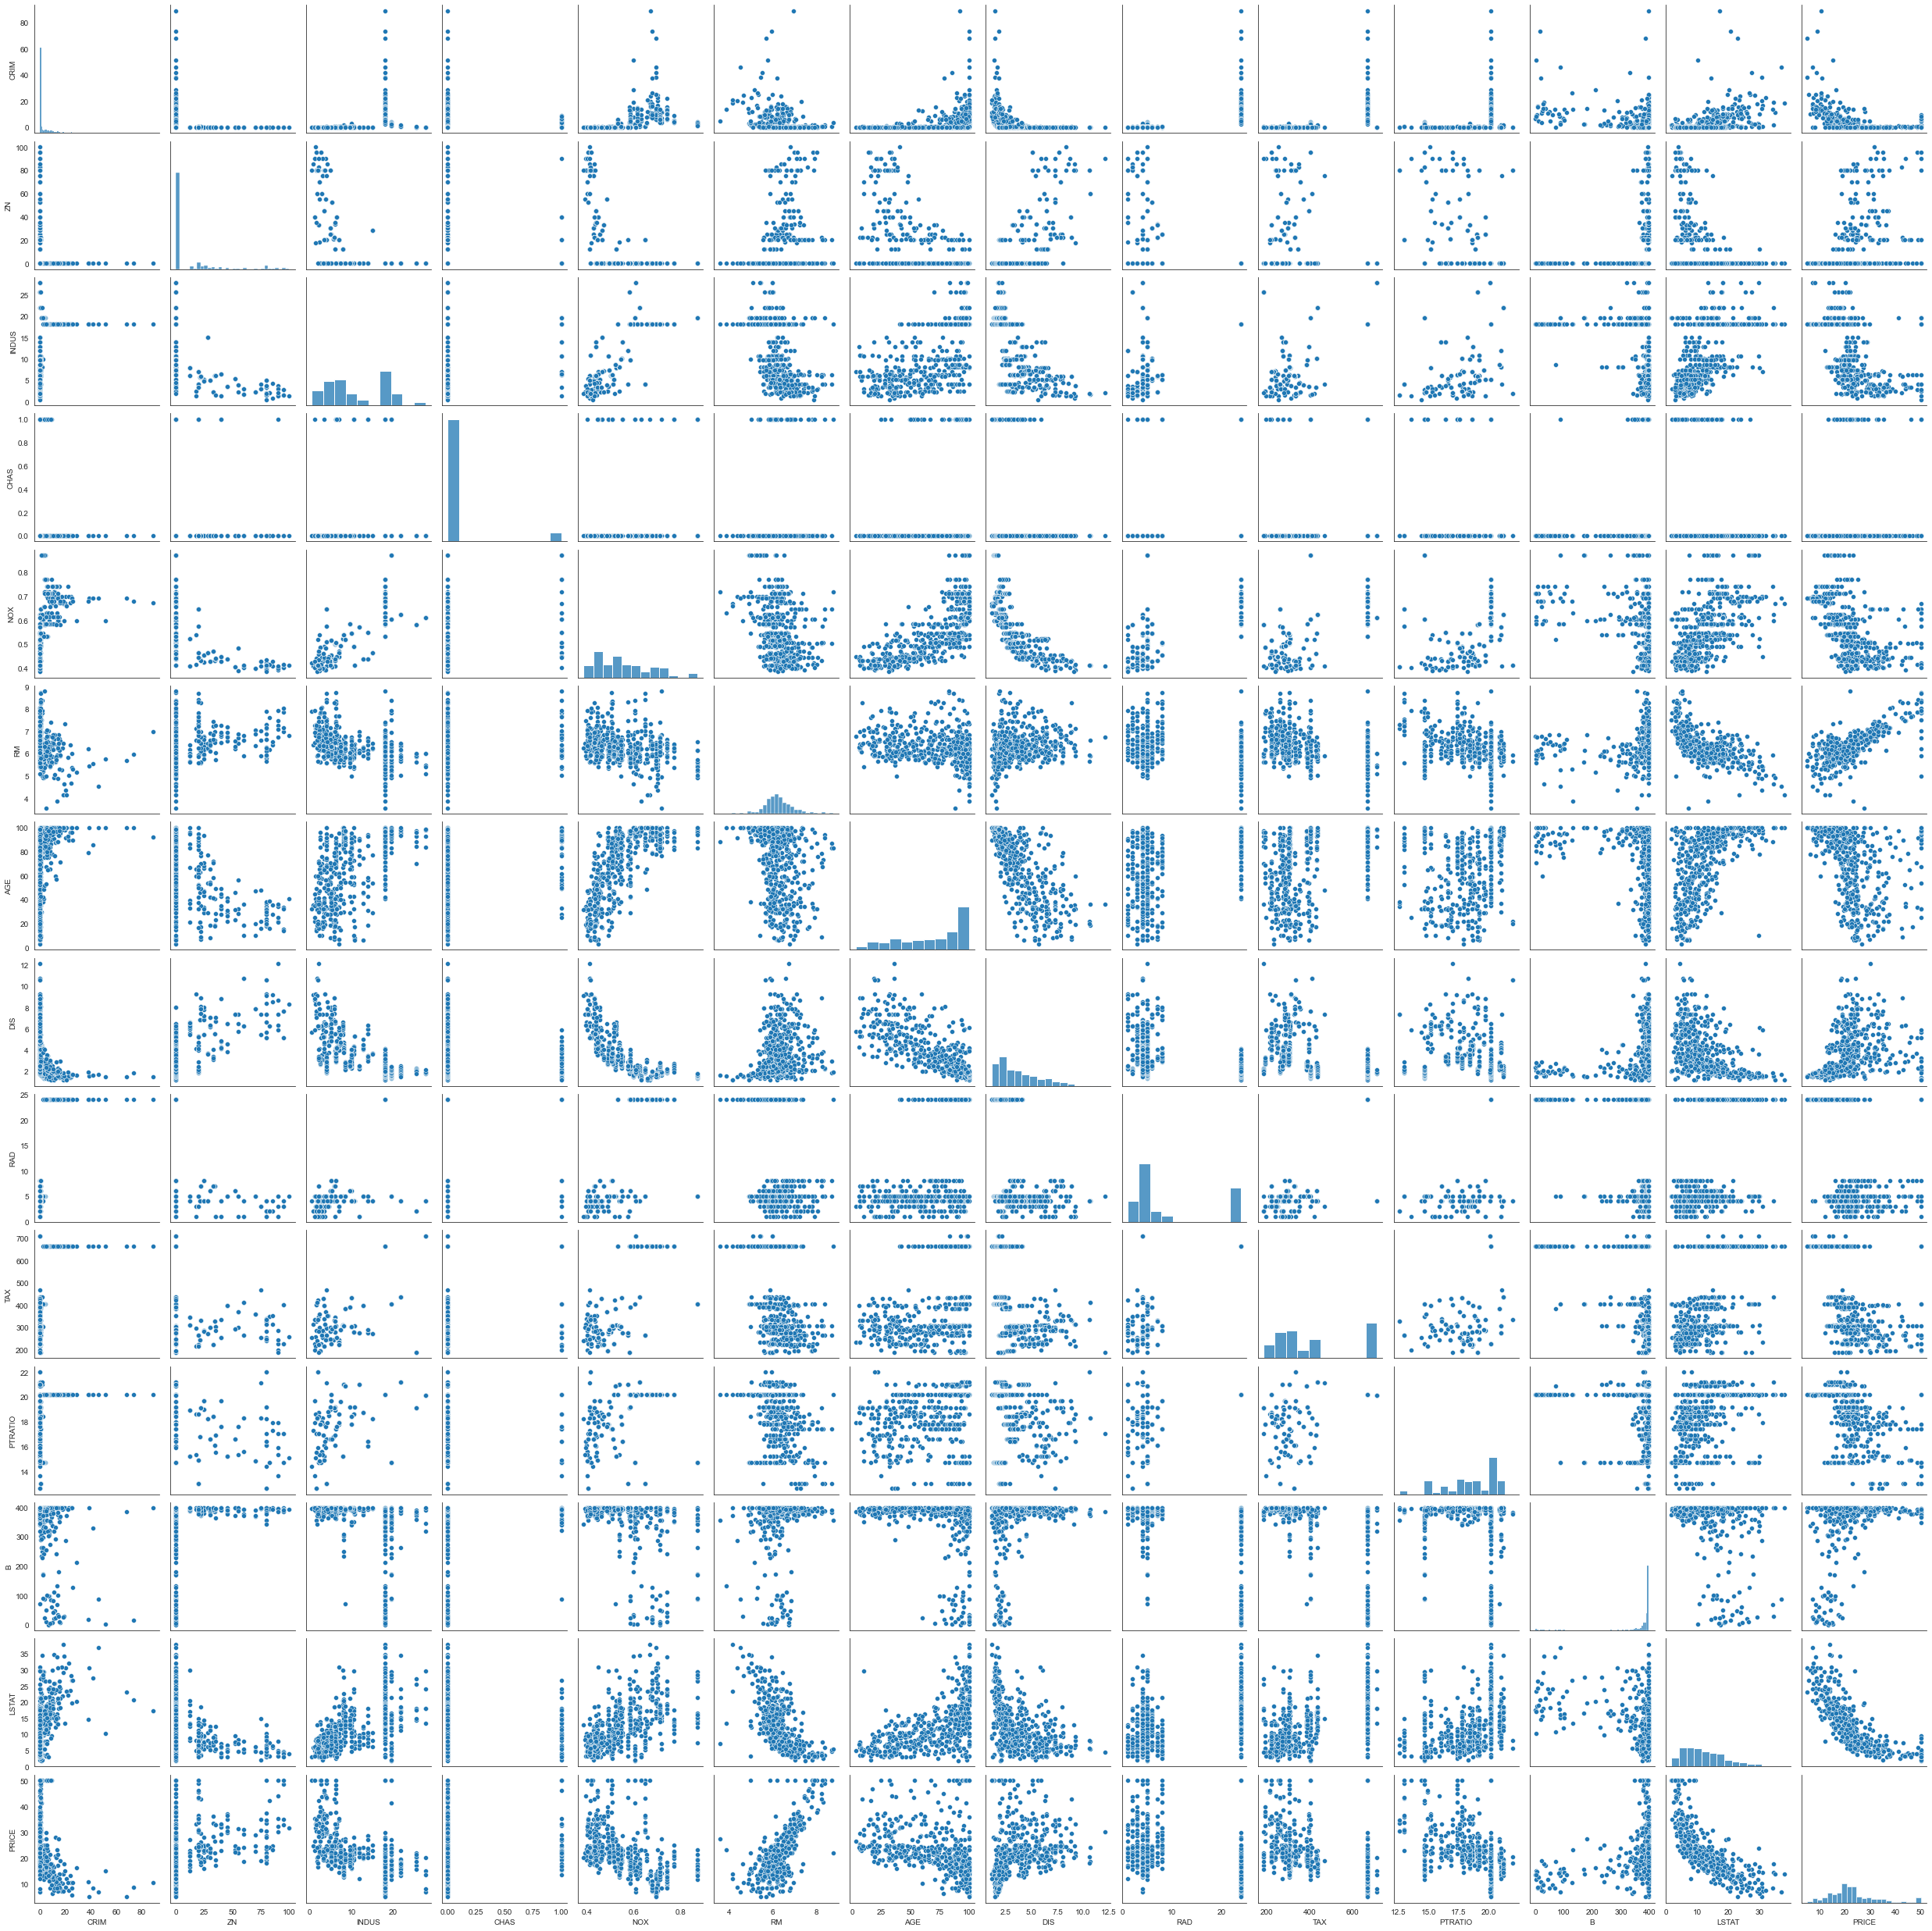

CPU times: total: 33.4 s
Wall time: 33.7 s


In [14]:
%%time 
#This time is a magic function of notebook, used to find the execution time of a piece of code.
#Since generation of pairplot will take some time, let us measure it using this magic function.
#It will print the wall time in the end.

#Generating pairplot - all correlation plots at once
sns.pairplot(dataset)
plt.show()